In [1]:
from datasets import load_dataset
import re


/home/342b/nlp_project/my_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def clean_text(text):
    """
    Perform basic data cleaning for NLP tasks on a given text.

    Args:
        text (str): The text to clean.

    Returns:
        str: The cleaned text.
    """
   
    text = re.sub(r"\s+", " ", text)  # Replace multiple spaces with a single space
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9.,!?'\s]", "", text)  # Remove special characters, but keep punctuation
    text = re.sub(r"(?<!\w)@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = text.strip()  # Remove leading and trailing spaces
    return text

In [3]:

def load_and_combine_contexts():
    """
    Load datasets from PubMedQA and extract only the context column from each subset.
    Combine contexts from all three subsets into a single list.
    
    Returns:
        combined_contexts (list): A list containing all contexts from the three datasets.
    """
    # Load datasets
    ds_artificial = load_dataset("qiaojin/PubMedQA", "pqa_artificial")
    ds_labeled = load_dataset("qiaojin/PubMedQA", "pqa_labeled")
    ds_unlabeled = load_dataset("qiaojin/PubMedQA", "pqa_unlabeled")
    dataset2_knowledge = load_dataset("medalpaca/medical_meadow_wikidoc")
    
    # Extract context columns
    artificial_contexts = ds_artificial["train"]["context"]
    labeled_contexts = ds_labeled["train"]["context"]
    unlabeled_contexts = ds_unlabeled["train"]["context"]
    dataset2_contexts = dataset2_knowledge["train"]["output"]
    
    # Combine all contexts
    combined_contexts = artificial_contexts + labeled_contexts + unlabeled_contexts+ dataset2_contexts
    
    
    return combined_contexts




In [4]:
all_context = load_and_combine_contexts()


In [5]:
len(all_context)

283518

Top Entities in Ds_query (metamap_phrases):
[('patient', 6137), ('following', 5221), ('min', 4142), ('blood pressure', 3681), ('temperature', 3019), ('physician', 2921), ('pulse', 2875), ('brought', 2323), ('emergency department', 2079), ('respirations', 1672), ('98', 1434), ('not', 1294), ('months', 1273), ('past', 1214), ('management', 1168), ('years', 1165), ('pain', 1160), ('significant', 1075), ('physical examination', 1056), ('mother', 1020), ('abnormalities', 1011), ('normal', 989), ('respiratory rate', 966), ('most likely diagnosis', 907), ('year old woman', 850), ('normal limits', 839), ('year old man', 836), ('fever', 834), ('shown', 826), ('hypertension', 809), ('symptoms', 779), ('history', 774), ('reports', 743), ('weeks', 740), ('unremarkable', 728), ('most appropriate next step', 716), ('day', 697), ('time', 667), ('36', 649), ('to', 615), ('room air', 614), ('started', 613), ('99', 603), ('states', 600), ('oxygen saturation', 600), ('medications', 591), ('notable', 590)

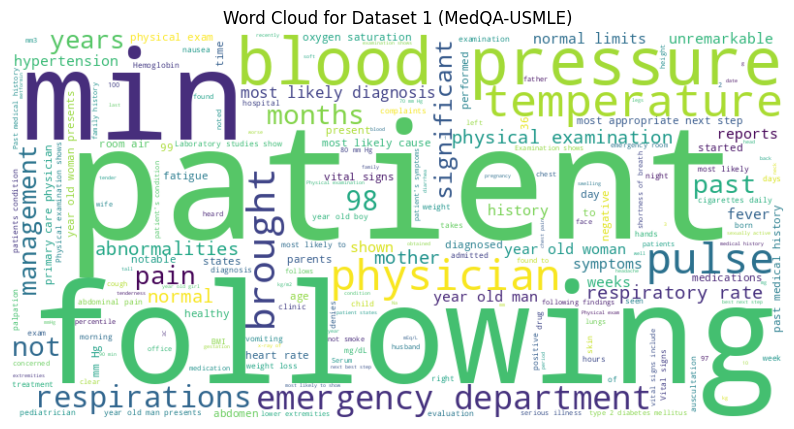


Top Entities in Dataset2 (output):
[('patients', 5575), ('disease', 5304), ('syndrome', 3792), ('include', 3329), ('blood', 2816), ('risk', 2524), ('associated', 2431), ('treatment', 2298), ('symptoms', 2264), ('heart', 2261), ('cell', 2219), ('therapy', 2117), ('cells', 2097), ('cancer', 1992), ('diagnosis', 1988), ('infection', 1963), ('usually', 1947), ('cases', 1823), ('interaction', 1729), ('cause', 1693), ('pain', 1663), ('common', 1653), ('findings', 1640), ('patient', 1580), ('type', 1540), ('causes', 1507), ('mg', 1479), ('following', 1377), ('left', 1309), ('skin', 1307), ('tumor', 1279), ('age', 1270), ('years', 1268), ('high', 1263), ('normal', 1263), ('CT', 1253), ('present', 1246), ('failure', 1203), ('surgery', 1129), ('acute', 1120), ('tissue', 1112), ('pulmonary', 1108), ('use', 1105), ('cardiac', 1076), ('ventricular', 1039), ('factors', 1037), ('increased', 1026), ('system', 1019), ('clinical', 1018), ('rate', 1013), ('artery', 1006), ('liver', 977), ('history', 976

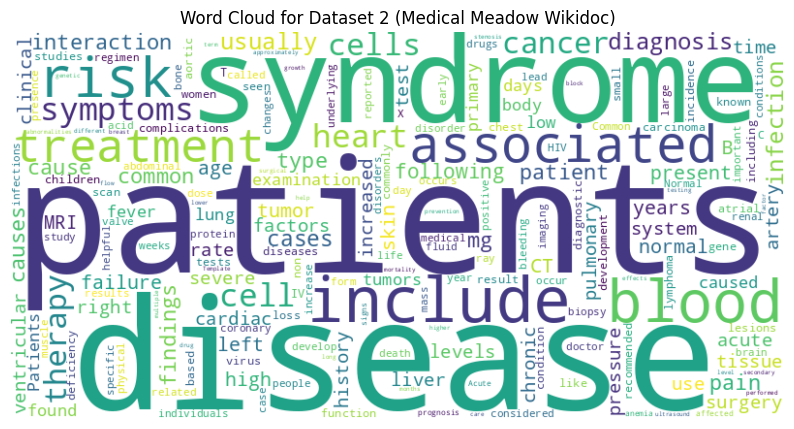


Top Entities in PubMedQA Artificial (context):
[('patients', 299432), ('cells', 151670), ('study', 140191), ('expression', 131824), ('P', 129629), ('group', 121671), ('significantly', 108522), ('cell', 107959), ('levels', 104124), ('associated', 94940), ('increased', 87858), ('compared', 86698), ('p', 79939), ('analysis', 73752), ('treatment', 73472), ('induced', 68122), ('protein', 66577), ('mice', 66381), ('significant', 65265), ('control', 63905), ('disease', 61395), ('groups', 61087), ('age', 60379), ('risk', 58861), ('higher', 58817), ('cancer', 58401), ('effect', 56884), ('years', 53527), ('effects', 53139), ('time', 52501), ('activity', 52394), ('high', 51960), ('blood', 49700), ('respectively', 49334), ('showed', 48478), ('treated', 46190), ('measured', 46091), ('factor', 44529), ('gene', 44430), ('CI', 44422), ('performed', 44350), ('n', 44022), ('human', 42825), ('mean', 42108), ('found', 41168), ('clinical', 40748), ('total', 40741), ('response', 40352), ('rats', 40252), ('

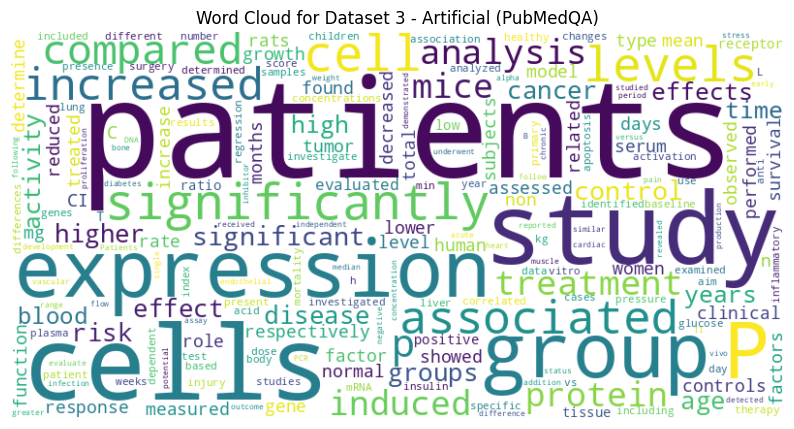


Top Entities in PubMedQA labeled (context):
[('patients', 2268), ('study', 899), ('group', 795), ('years', 519), ('age', 440), ('significant', 417), ('groups', 416), ('compared', 413), ('treatment', 394), ('significantly', 394), ('women', 360), ('risk', 357), ('p', 345), ('analysis', 342), ('mean', 327), ('CI', 321), ('associated', 316), ('care', 311), ('P', 306), ('cancer', 302), ('data', 296), ('disease', 293), ('time', 290), ('rate', 289), ('clinical', 280), ('performed', 276), ('higher', 268), ('year', 264), ('surgery', 264), ('control', 261), ('patient', 261), ('total', 252), ('pain', 239), ('use', 238), ('cases', 234), ('n', 229), ('months', 227), ('respectively', 224), ('included', 223), ('factors', 221), ('survival', 215), ('determine', 211), ('follow', 210), ('mortality', 210), ('difference', 203), ('levels', 202), ('found', 200), ('hospital', 197), ('children', 196), ('blood', 195), ('number', 194), ('non', 193), ('health', 193), ('test', 190), ('rates', 189), ('score', 188)

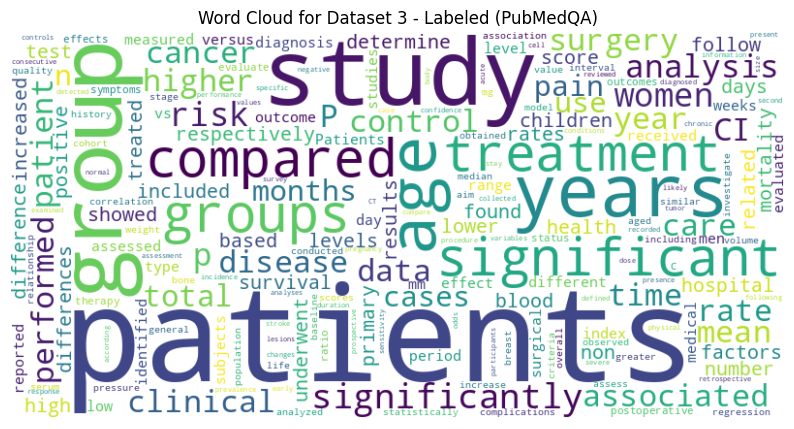


Top Entities in PubMedQA unlabeled (context):
[('patients', 138211), ('study', 50921), ('group', 45142), ('years', 31163), ('age', 27578), ('compared', 25669), ('groups', 24269), ('significant', 24188), ('risk', 22890), ('significantly', 21890), ('treatment', 20894), ('mean', 20732), ('analysis', 19879), ('associated', 19845), ('P', 19766), ('women', 19263), ('time', 18716), ('clinical', 17736), ('months', 17704), ('p', 17485), ('performed', 17389), ('disease', 17350), ('patient', 17028), ('higher', 16977), ('CI', 16884), ('data', 16832), ('total', 16136), ('rate', 15697), ('respectively', 15554), ('care', 15380), ('surgery', 15167), ('cases', 14746), ('cancer', 14446), ('year', 14441), ('use', 13970), ('health', 13964), ('n', 13924), ('included', 13583), ('levels', 13342), ('control', 13257), ('children', 13215), ('found', 12624), ('high', 12585), ('determine', 12465), ('follow', 12287), ('underwent', 12244), ('increased', 12194), ('test', 11743), ('factors', 11585), ('based', 11492)

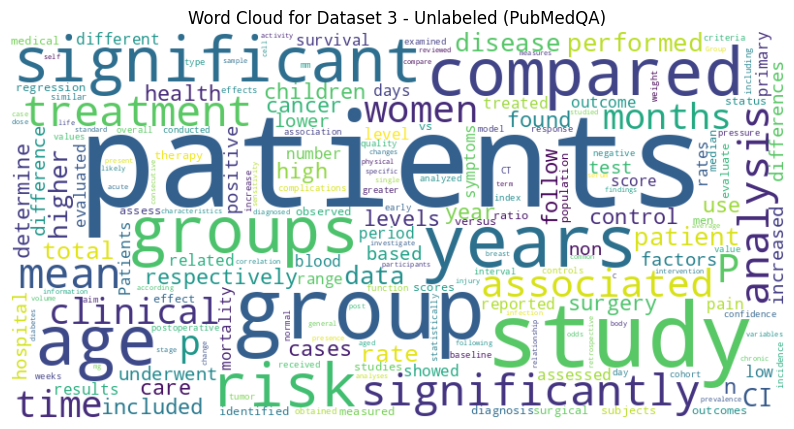

In [13]:
from datasets import load_dataset
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy

# Load datasets
ds_query = load_dataset("GBaker/MedQA-USMLE-4-options", split="train")  # MedQA-USMLE
dataset2_knowledge = load_dataset("medalpaca/medical_meadow_wikidoc", split="train")  # Medical Meadow Wikidoc
dataset3_artificial = load_dataset("qiaojin/PubMedQA", "pqa_artificial", split="train")  # PubMedQA Artificial
dataset3_labeled = load_dataset("qiaojin/PubMedQA", "pqa_labeled", split="train")  # PubMedQA Labeled
dataset3_unlabeled = load_dataset("qiaojin/PubMedQA", "pqa_unlabeled", split="train")  # PubMedQA Unlabeled

# Load spaCy's NER model (use scispacy or en_core_web_sm)
nlp = spacy.load("en_core_web_sm")  # Use "en_core_sci_sm" for SciSpacy model if available

# Function to extract tokens or entities
def extract_tokens_from_text(text_list, nlp_model):
    tokens = []
    for text in text_list:
        doc = nlp_model(text)
        tokens.extend([token.text for token in doc if not token.is_stop and token.is_alpha])
    return tokens

# Function to generate a word cloud
def generate_word_cloud(counter, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(counter)
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Dataset 1: Extract phrases from `metamap_phrases`
dataset1_phrases = [phrase for entry in ds_query["metamap_phrases"] for phrase in entry]
dataset1_counter = Counter(dataset1_phrases)
# Step 3: Compare Top Entities Between Datasets
print("Top Entities in Ds_query (metamap_phrases):")
print(dataset1_counter.most_common(100))
generate_word_cloud(dataset1_counter, "Word Cloud for Dataset 1 (MedQA-USMLE)")

# Dataset 2: Extract entities from `output`
dataset2_outputs = dataset2_knowledge["output"]
dataset2_tokens = extract_tokens_from_text(dataset2_outputs, nlp)
dataset2_counter = Counter(dataset2_tokens)
print("\nTop Entities in Dataset2 (output):")
print(dataset2_counter.most_common(100))
generate_word_cloud(dataset2_counter, "Word Cloud for Dataset 2 (Medical Meadow Wikidoc)")

# Dataset 3: Extract contexts for each subset
def extract_contexts(dataset):
    contexts = [context for entry in dataset["context"] for context in entry["contexts"]]
    return contexts

# PubMedQA Artificial
dataset3_artificial_contexts = extract_contexts(dataset3_artificial)
artificial_tokens = extract_tokens_from_text(dataset3_artificial_contexts, nlp)
artificial_counter = Counter(artificial_tokens)
print("\nTop Entities in PubMedQA Artificial (context):")
print(artificial_counter.most_common(100))
generate_word_cloud(artificial_counter, "Word Cloud for Dataset 3 - Artificial (PubMedQA)")

# PubMedQA Labeled
dataset3_labeled_contexts = extract_contexts(dataset3_labeled)
labeled_tokens = extract_tokens_from_text(dataset3_labeled_contexts, nlp)
labeled_counter = Counter(labeled_tokens)
print("\nTop Entities in PubMedQA labeled (context):")
print(labeled_counter.most_common(100))
generate_word_cloud(labeled_counter, "Word Cloud for Dataset 3 - Labeled (PubMedQA)")

# PubMedQA Unlabeled
dataset3_unlabeled_contexts = extract_contexts(dataset3_unlabeled)
unlabeled_tokens = extract_tokens_from_text(dataset3_unlabeled_contexts, nlp)
unlabeled_counter = Counter(unlabeled_tokens)
print("\nTop Entities in PubMedQA unlabeled (context):")
print(unlabeled_counter.most_common(100))
generate_word_cloud(unlabeled_counter, "Word Cloud for Dataset 3 - Unlabeled (PubMedQA)")


In [15]:
from collections import Counter

def compare_most_common(counter1, counter2, n=10):
    """
    Compare the most common words between two datasets.

    Args:
        counter1 (Counter): Word frequency counter for Dataset1.
        counter2 (Counter): Word frequency counter for Dataset2.
        n (int): Number of most common words to compare.

    Returns:
        dict: A dictionary containing:
              - common_words: Words present in both datasets with their frequencies.
              - unique_to_ds1: Words unique to Dataset1.
              - unique_to_ds2: Words unique to Dataset2.
    """
    # Extract most common words
    top_words_ds1 = dict(counter1.most_common(n))
    top_words_ds2 = dict(counter2.most_common(n))

    # Find common words
    common_words = {
        word: (top_words_ds1[word], top_words_ds2[word])
        for word in top_words_ds1 if word in top_words_ds2
    }

    # Words unique to each dataset
    unique_to_ds1 = {word: freq for word, freq in top_words_ds1.items() if word not in top_words_ds2}
    unique_to_ds2 = {word: freq for word, freq in top_words_ds2.items() if word not in top_words_ds1}

    # Return results
    return {
        "common_words": common_words,
        "unique_to_ds1": unique_to_ds1,
        "unique_to_ds2": unique_to_ds2
    }




In [16]:

# Compare most common words
comparison_result_with_dataset2 = compare_most_common(dataset1_counter, dataset2_counter, n=1000)
comparison_result_with_dataset3_artificial = compare_most_common(dataset1_counter, artificial_counter, n=1000)
comparison_result_with_dataset3_labeled = compare_most_common(dataset1_counter, labeled_counter, n=1000)
comparison_result_with_dataset3_unlabeled = compare_most_common(dataset1_counter, unlabeled_counter, n=1000)

# Print results
print("Common Words with Frequencies (Dataset1, Dataset2):")
for word, freqs in comparison_result_with_dataset2["common_words"].items():
    print(f"{word}: {freqs}")
    

Common Words with Frequencies (Dataset1, Dataset2):
patient: (6137, 1580)
following: (5221, 1377)
pulse: (2875, 185)
months: (1273, 544)
management: (1168, 451)
years: (1165, 1268)
pain: (1160, 1663)
significant: (1075, 421)
abnormalities: (1011, 501)
normal: (989, 1263)
fever: (834, 888)
shown: (826, 439)
hypertension: (809, 485)
symptoms: (779, 2264)
history: (774, 976)
weeks: (740, 605)
day: (697, 621)
time: (667, 946)
medications: (591, 454)
abdomen: (585, 207)
fatigue: (547, 203)
diagnosed: (545, 371)
age: (532, 1270)
negative: (478, 396)
healthy: (477, 182)
performed: (474, 539)
present: (468, 1246)
nausea: (463, 178)
vomiting: (457, 298)
examination: (443, 940)
evaluation: (437, 307)
hospital: (434, 199)
weight: (430, 403)
child: (415, 255)
drug: (401, 519)
hours: (396, 490)
days: (389, 834)
treatment: (378, 2298)
week: (369, 202)
diagnosis: (366, 1988)
positive: (351, 599)
right: (346, 965)
seen: (340, 773)
exam: (340, 276)
skin: (336, 1307)
face: (325, 173)
patients: (324, 557

In [17]:
print("Common Words with Frequencies (Dataset1, dataset3_artificial):")
for word, freqs in comparison_result_with_dataset3_artificial["common_words"].items():
    print(f"{word}: {freqs}")
    


Common Words with Frequencies (Dataset1, dataset3_artificial):
patient: (6137, 24058)
following: (5221, 18432)
min: (4142, 22184)
months: (1273, 35180)
management: (1168, 4575)
years: (1165, 53527)
pain: (1160, 18319)
significant: (1075, 65265)
normal: (989, 35812)
shown: (826, 16118)
hypertension: (809, 9210)
symptoms: (779, 15475)
history: (774, 9301)
weeks: (740, 27364)
day: (697, 31163)
time: (667, 52501)
diagnosed: (545, 7942)
age: (532, 60379)
negative: (478, 18818)
healthy: (477, 24626)
performed: (474, 44350)
present: (468, 23610)
examination: (443, 6159)
evaluation: (437, 6085)
hospital: (434, 14162)
weight: (430, 21808)
drug: (401, 11401)
hours: (396, 18046)
days: (389, 37118)
treatment: (378, 73472)
week: (369, 12937)
diagnosis: (366, 12971)
BMI: (363, 12888)
positive: (351, 32070)
right: (346, 8009)
seen: (340, 7688)
skin: (336, 9909)
patients: (324, 299432)
Serum: (314, 7123)
found: (300, 41168)
left: (281, 15488)
year: (277, 22308)
mg: (264, 37286)
kg: (250, 27775)
blood:

In [19]:
print("Common Words with Frequencies (Dataset1, dataset3_labeled):")
for word, freqs in comparison_result_with_dataset3_labeled["common_words"].items():
    print(f"{word}: {freqs}")
    


Common Words with Frequencies (Dataset1, dataset3_labeled):
patient: (6137, 261)
following: (5221, 82)
min: (4142, 80)
physician: (2921, 54)
months: (1273, 227)
management: (1168, 75)
years: (1165, 519)
pain: (1160, 239)
significant: (1075, 417)
normal: (989, 94)
shown: (826, 36)
hypertension: (809, 42)
symptoms: (779, 130)
history: (774, 111)
reports: (743, 46)
weeks: (740, 135)
day: (697, 138)
time: (667, 290)
diagnosed: (545, 83)
age: (532, 440)
parents: (481, 31)
negative: (478, 89)
healthy: (477, 68)
performed: (474, 276)
present: (468, 96)
examination: (443, 72)
evaluation: (437, 56)
hospital: (434, 197)
weight: (430, 100)
child: (415, 30)
drug: (401, 44)
hours: (396, 77)
clinic: (396, 62)
days: (389, 176)
treatment: (378, 394)
week: (369, 65)
diagnosis: (366, 167)
BMI: (363, 67)
positive: (351, 170)
right: (346, 49)
born: (342, 25)
seen: (340, 56)
admitted: (338, 57)
skin: (336, 29)
patients: (324, 2268)
medication: (305, 31)
noted: (302, 34)
found: (300, 200)
left: (281, 78)
ye

In [20]:
print("Common Words with Frequencies (Dataset1, dataset3_unlabeled):")
for word, freqs in comparison_result_with_dataset3_unlabeled["common_words"].items():
    print(f"{word}: {freqs}")

Common Words with Frequencies (Dataset1, dataset3_unlabeled):
patient: (6137, 17028)
following: (5221, 5412)
min: (4142, 4479)
physician: (2921, 2373)
months: (1273, 17704)
past: (1214, 1457)
management: (1168, 4671)
years: (1165, 31163)
pain: (1160, 9615)
significant: (1075, 24188)
abnormalities: (1011, 1374)
normal: (989, 7184)
shown: (826, 2194)
hypertension: (809, 2658)
symptoms: (779, 9011)
history: (774, 4843)
reports: (743, 2201)
weeks: (740, 6611)
day: (697, 7092)
time: (667, 18716)
diagnosed: (545, 4960)
age: (532, 27578)
parents: (481, 1830)
negative: (478, 6873)
healthy: (477, 4510)
performed: (474, 17389)
present: (468, 5786)
examination: (443, 4328)
evaluation: (437, 3812)
hospital: (434, 11341)
weight: (430, 6298)
child: (415, 2396)
drug: (401, 3150)
hours: (396, 4248)
clinic: (396, 2210)
days: (389, 9822)
treatment: (378, 20894)
week: (369, 3444)
diagnosis: (366, 8991)
BMI: (363, 4065)
positive: (351, 11269)
right: (346, 2853)
born: (342, 1284)
seen: (340, 3308)
admitted

In [ ]:

from datasets import load_dataset
import re

# Load Datasets
dataset1 = load_dataset("GBaker/MedQA-USMLE-4-options", split="train")  # Replace with actual dataset name


#  Flatten all options across rows into a single list
def flatten_all_options(dataset, options_key="options"):
    """
    Flatten all options (values from 'A', 'B', 'C', 'D') into a single list of unique options.
    """
    all_options = []
    for row in dataset[options_key]:  # Each row contains a dictionary {"A": "...", "B": "...", ...}
        all_options.extend(row.values())  # Extract the values (option texts)
    return list(set(all_options))  # Remove duplicates

# Extract unique options from Dataset1
dataset1_options = flatten_all_options(dataset1)
print(f"Total unique options in Dataset1: {len(dataset1_options)}")

# Combine all 'output' text in Dataset2 into a single lowercase string
def combine_outputs(dataset, output_key="output"):
    """
    Combine all outputs in Dataset2 into a single lowercase string.
    """
    combined_text = " ".join(dataset[output_key]).lower()
    return combined_text

def load_and_combine_contexts():
    """
    Load datasets from PubMedQA and extract only the context column from each subset.
    Combine contexts from all three subsets into a single list.
    
    Returns:
        combined_contexts (list): A list containing all contexts from the three datasets.
    """
    # Load datasets
    ds_artificial = load_dataset("qiaojin/PubMedQA", "pqa_artificial")
    ds_labeled = load_dataset("qiaojin/PubMedQA", "pqa_labeled")
    ds_unlabeled = load_dataset("qiaojin/PubMedQA", "pqa_unlabeled")
    dataset2_knowledge = load_dataset("medalpaca/medical_meadow_wikidoc")
    
    # Extract context columns
    artificial_contexts = ds_artificial["train"]["context"]
    labeled_contexts = ds_labeled["train"]["context"]
    unlabeled_contexts = ds_unlabeled["train"]["context"]
    dataset2_contexts = dataset2_knowledge["train"]["output"]
    
    # Combine all contexts
    combined_contexts = artificial_contexts + labeled_contexts + unlabeled_contexts+ dataset2_contexts
    
    
    return combined_contexts

# Combine outputs from Datasets
dataset_combined_output = load_and_combine_contexts()
print(f"Combined output length from Dataset2: {len(dataset_combined_output)} characters")

# Check which options are NOT present in Datasets
def find_missing_options(options, combined_text):
    """
    Check for options not present in the combined Dataset2 output text.
    """
    missing_options = [
        option for option in options
        if not re.search(rf"\b{re.escape(option.lower())}\b", combined_text)  # Case-insensitive exact match
    ]
    return missing_options

# Find missing options
missing_options = find_missing_options(dataset1_options, dataset_combined_output)




In [36]:
# Display Results
print(f"\nNumber of options not found in Dataset2: {len(missing_options)}")
if missing_options:
    print("Missing options (first 10):")
    for option in missing_options[:]:  # Display first 10 missing options
        print(f"- {option}")
else:
    print("All options from Dataset1 are present in Dataset2.")


Number of options not found in Dataset2: 21119
Missing options (first 10):
- Oral amoxicillin for 6 weeks
- The patient can be initially managed conservatively with corticosteroids and observation.
- Antibody-mediated vasculopathy
- Glucose-6-phosphate --> fructose-6-phosphate
- Reassurance and followup in 1 week
- Any decision regarding the mode of delivery in this patient should be taken after an amniocentesis to determine the fetal lung maturity
- Pulmonary artery thrombus
- ↑ ↓ unchanged
- (C)
- “Chronic use of this medication can lead to tardive dyskinesia.”
- Stares at own hand
- Colonoscopy: Patches of mucosal erosions with pseudomembrane formation, Barium study: Cobblestone appearance with strictures
- Neuromuscular irritability
- FGFR3 receptor
- Proteins that bind to the Fc region of immunoglobulin G
- Motile round or oval-shaped microorganisms
- Hyperbaric oxygen treatment for 4 weeks
- Vitreous body of the eye
- Thinning of the mucosa
- Inhibition of the Na+/K+-ATPase pump

In [39]:
from datasets import load_dataset
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Ensure nltk resources are downloaded
import nltk
nltk.download("punkt")
nltk.download("stopwords")

# Load Datasets
dataset1 = load_dataset("GBaker/MedQA-USMLE-4-options", split="train")  # Replace with actual dataset name
dataset2 = load_dataset("medalpaca/medical_meadow_wikidoc", split="train")

# Flatten options and extract keywords
def extract_keywords_from_options(dataset, options_key="options"):
    """
    Flatten options and extract meaningful keywords by tokenizing and removing stopwords.
    """
    stop_words = set(stopwords.words("english"))
    all_keywords = []

    for row in dataset[options_key]:  # Each row is a dictionary {"A": "...", "B": "..."}
        for option_text in row.values():  # Extract each option value
            tokens = word_tokenize(option_text.lower())  # Tokenize and lowercase
            keywords = [word for word in tokens if word not in stop_words and word not in string.punctuation]
            all_keywords.extend(keywords)

    return list(set(all_keywords))  # Remove duplicates

# Extract keywords from Dataset1 options
dataset1_keywords = extract_keywords_from_options(dataset1)
print(f"Total unique keywords extracted from Dataset1 options: {len(dataset1_keywords)}")

# Combine all outputs from Dataset2 into a single string
def combine_outputs(dataset, output_key="output"):
    """
    Combine all outputs in Dataset2 into a single lowercase string.
    """
    combined_text = " ".join(dataset[output_key]).lower()
    return combined_text

# Combine Dataset2 outputs
dataset2_combined_output = combine_outputs(dataset2)
print(f"Combined output length from Dataset2: {len(dataset2_combined_output)} characters")

# Check keyword presence in Dataset2
def find_missing_keywords(keywords, combined_text):
    """
    Check which keywords are NOT present in the combined text of Dataset2.
    """
    missing_keywords = [keyword for keyword in keywords if not re.search(rf"\b{re.escape(keyword)}\b", combined_text)]
    return missing_keywords

# Find missing keywords
missing_keywords = find_missing_keywords(dataset1_keywords, dataset2_combined_output)

# Display results
print(f"\nNumber of keywords not found in Dataset2: {len(missing_keywords)}")
if missing_keywords:
    print("Missing keywords (first 10):")
    for keyword in missing_keywords[:10]:
        print(f"- {keyword}")
else:
    print("All keywords from Dataset1 options are present in Dataset2.")


[nltk_data] Downloading package punkt to /home/342b/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/342b/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total unique keywords extracted from Dataset1 options: 15121
Combined output length from Dataset2: 9138221 characters

Number of keywords not found in Dataset2: 3234
Missing keywords (first 10):
- agonistic
- calicivirus
- methyl-cpg-binding
- left-ventricular
- cricothyroiditomy
- s1-s3
- supracondular
- uncrossing
- nitrogen/creatinine
- cordocentesis


In [41]:



# Display results
print(f"\nNumber of keywords not found in Dataset2: {len(missing_keywords)}")
if missing_keywords:
    print("Missing keywords (first 10):")
    for keyword in missing_keywords[:]:
        print(f"- {keyword}")
else:
    print("All keywords from Dataset1 options are present in Dataset2.")


Number of keywords not found in Dataset2: 3234
Missing keywords (first 10):
- agonistic
- calicivirus
- methyl-cpg-binding
- left-ventricular
- cricothyroiditomy
- s1-s3
- supracondular
- uncrossing
- nitrogen/creatinine
- cordocentesis
- crosse
- peroxidase-positive
- nitroblue
- mesonephric
- pre-transfusion
- neer
- hbsab
- intercalator
- corticotropes
- print-out
- osteoblastic
- isodisomy
- panencephalitis
- nagging
- cyclase-cyclic
- uricase
- rtp801
- obliterate
- unfractioned
- +21
- b8/b2
- barts
- tiptoes
- anti-hepatitis
- conjoint
- methylergometrine
- transscaphoid
- myofilaments
- iatrogenesis
- urethral/paraurethral
- suprascapular
- peritoneovenous
- dmd
- sphingomyelin
- 1700
- estrogen/progestin
- maltase
- slots
- arabinosyl
- mma
- walled-off
- double-strand
- await
- snuffbox
- 1/64
- tantrum
- cephalohematoma
- monophaste
- fibular
- plectin
- a7/a5
- sulphonylurea
- golden-brown
- fructose-2,6-biphosphate
- 17,20-desmolase
- paratyphi
- fbn-1
- rh-positive
- ret

In [11]:
from datasets import load_dataset
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

# Ensure nltk resources are available
import nltk
nltk.download("punkt")
nltk.download("stopwords")

# Load Datasets
ds_artificial = load_dataset("qiaojin/PubMedQA", "pqa_artificial")
ds_labeled = load_dataset("qiaojin/PubMedQA", "pqa_labeled")
ds_unlabeled = load_dataset("qiaojin/PubMedQA", "pqa_unlabeled")
dataset2_knowledge = load_dataset("medalpaca/medical_meadow_wikidoc")
ds = load_dataset("GBaker/MedQA-USMLE-4-options", split="train")

# Preprocessing function to extract keywords
def extract_keywords(text, stop_words):
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word not in stop_words and word not in string.punctuation]

# Extract keywords from Dataset1's "options"
def extract_options_keywords(dataset, options_key="options"):
    stop_words = set(stopwords.words("english"))
    all_keywords = []
    for row in dataset[options_key]:
        all_keywords.extend(extract_keywords(" ".join(row.values()), stop_words))
    return list(set(all_keywords))

options_keywords = extract_options_keywords(ds)
print(f"Total unique keywords in Dataset1 'options': {len(options_keywords)}")

# Extract keywords from other datasets
def extract_from_contexts(dataset, column_name):
    stop_words = set(stopwords.words("english"))
    all_keywords = []
    for row in dataset["train"][column_name]:
        if isinstance(row, dict) and "contexts" in row:
            for context in row["contexts"]:
                all_keywords.extend(extract_keywords(context, stop_words))
    return list(set(all_keywords))

def extract_from_output(dataset, column_name="output"):
    stop_words = set(stopwords.words("english"))
    all_keywords = []
    for row in dataset["train"][column_name]:
        all_keywords.extend(extract_keywords(row, stop_words))
    return list(set(all_keywords))

# Extract features
artificial_keywords = extract_from_contexts(ds_artificial, "context")
labeled_keywords = extract_from_contexts(ds_labeled, "context")
unlabeled_keywords = extract_from_contexts(ds_unlabeled, "context")
knowledge_keywords = extract_from_output(dataset2_knowledge)

# Compare Dataset1 options keywords with extracted keywords
def find_missing_keywords(keywords, extracted_keywords):
    return [kw for kw in keywords if kw not in extracted_keywords]

missing_from_artificial = find_missing_keywords(options_keywords, artificial_keywords)
missing_from_labeled = find_missing_keywords(options_keywords, labeled_keywords)
missing_from_unlabeled = find_missing_keywords(options_keywords, unlabeled_keywords)
missing_from_knowledge = find_missing_keywords(options_keywords, knowledge_keywords)

# Display Results
print("\nMissing keywords from ds_artificial:", missing_from_artificial[:10])
print("Missing keywords from ds_labeled:", missing_from_labeled[:10])
print("Missing keywords from ds_unlabeled:", missing_from_unlabeled[:10])
print("Missing keywords from dataset2_knowledge:", missing_from_knowledge[:10])


[nltk_data] Downloading package punkt to /home/342b/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/342b/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total unique keywords in Dataset1 'options': 15149

Missing keywords from ds_artificial: ['pseudo-right', '3,4-methylenedioxy-methamphetamine', 'disseminiated', 'argininosuccinase', '2.5–8.5', 'inguinale', 'shine-dalgarno', 'clang', 'sick-role', 'tram-track']
Missing keywords from ds_labeled: ['methionine', 'lakes', 'struma', 'fibromatosis', 'conjunction', 'ticarcillin', 'ewing', 'pseudo-right', 'btk', '17-beta-estradiol']
Missing keywords from ds_unlabeled: ['struma', 'ticarcillin', 'pseudo-right', '17-beta-estradiol', 'cuneatus', '3,4-methylenedioxy-methamphetamine', 'disseminiated', 'β-antagonist', 'argininosuccinase', 'medigap']
Missing keywords from dataset2_knowledge: ['re-infarction', 'pseudo-right', 'btk', '17-beta-estradiol', 'cuneatus', '3,4-methylenedioxy-methamphetamine', 'disseminiated', 'crown-rump', 'β-antagonist', 'argininosuccinase']


In [44]:
total_keywords = artificial_keywords+labeled_keywords+unlabeled_keywords+knowledge_keywords

In [45]:
len(total_keywords)

932401

In [46]:
total_missing_keyword = find_missing_keywords(options_keywords, total_keywords)
print("\nMissing keywords from ds_artificial:", total_missing_keyword[:100])


Missing keywords from ds_artificial: ['cricothyroiditomy', 'supracondular', 'dependence.', 'uncrossing', 'galactose-1', 'corticotropes', 'print-out', 'b8/b2', 'barts', 'tiptoes']


In [47]:
len(total_missing_keyword)

923

In [48]:
print("\nMissing keywords from ds_artificial:", total_missing_keyword[:100])


Missing keywords from ds_artificial: ['cricothyroiditomy', 'supracondular', 'dependence.', 'uncrossing', 'galactose-1', 'corticotropes', 'print-out', 'b8/b2', 'barts', 'tiptoes', 'transscaphoid', 'asthma.', 'urethral/paraurethral', 'arabinosyl', 'tantrum', 'monophaste', 'a7/a5', 'golden-brown', 'fructose-2,6-biphosphate', '17,20-desmolase', 'i-31', '25-hydroxyergocalciferol', 'metroendometritis', 'α-collagen', 'antagnoist', '199/200', 'mescaline', 'contraception-induced', 'organ-independent', 'pill-rolling', 'bacteria-coated', 'chromophobes', '7-α-hydroxylase', 'pseudohypercalcemia', 'tetanus/diphtheria/pertussis', 'cosynthase', 'overdiuresis', 'tachypnic', 'brachial-femoral', 'nalcn', 'divulge', 'normal-to-high', 'oculogyric', '67/181', 'anlages', 'phytonadione', '2.5–3.5', 'threshold.', 'dysfucntion', '160°f', 'pax8-ppar', 'cape-like', 'methoxyhemoglobin', 'adjoin', 'narcisstic', 'weepy', 'staphylocuccus', 'α-1,4-', 'alpha-1,6-glucosidase', 'intracerebellar', '2.0–3.0', '56/min', 'e

In [7]:
def extract_metamap_phrases(dataset, key="metamap_phrases"):
    all_phrases = []
    for phrases in dataset[key]:
        all_phrases.extend(phrases)
    return list(set(all_phrases))

metamap_phrases = extract_metamap_phrases(ds)
print(f"Total unique phrases in Dataset1 'metamap_phrases': {len(metamap_phrases)}")

Total unique phrases in Dataset1 'metamap_phrases': 80757


In [ ]:
missing_from_artificial = find_missing_keywords(metamap_phrases, artificial_keywords)
missing_from_labeled = find_missing_keywords(metamap_phrases, labeled_keywords)
missing_from_unlabeled = find_missing_keywords(metamap_phrases, unlabeled_keywords)
missing_from_knowledge = find_missing_keywords(metamap_phrases, knowledge_keywords)

In [ ]:
a = missing_from_artificial + missing_from_labeled + missing_from_unlabeled + missing_from_knowledge

In [52]:
len(a)

294504